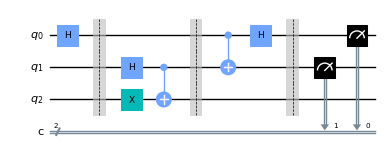

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(0)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw(output="mpl", scale=0.5)

In [17]:
backend = Aer.get_backend("statevector_simulator")
result = execute(circuit, backend = backend, shots = 10).result()
z = Statevector(result.get_statevector())
z.draw("Latex")

<IPython.core.display.Latex object>

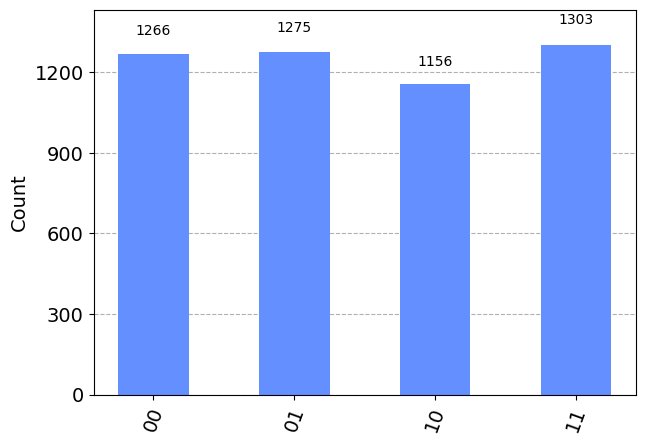

In [18]:
# circuit.measure_all()
sim = Aer.get_backend('aer_simulator')
job = execute(circuit, sim, shots=5000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)